## SVM, NN, CNN NoteBook
Ethan Young - 954408

**Task 4.1 - Multiclass SVM for Wine Data**  
Support Vector Machine to predict classes labels on the Winedataset.
Create, train and predict using an instance of the sklearn.svm.SVCobject as we are interested in the classification.


Precision mean of model Score:
1.0


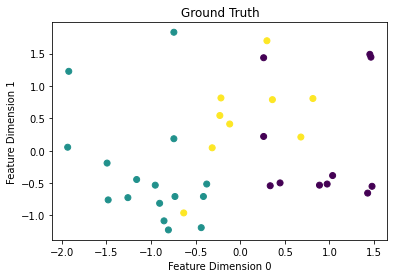

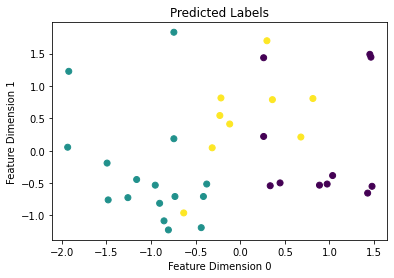

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

data = np.load("wineData.npy")
labels = np.load("wineLabels.npy")

x_feature = 0
y_feature = 1
train_Data = data[int(0) : int(len(data) * .8),:]
train_Labels = labels[int(0) : int(len(labels) * .8),]
test_Data = data[int(len(data) * .8) : int(len(data)), :]
test_Labels = labels[int(len(labels) * .8) : int(len(labels)),]

normaliser = StandardScaler()
train_Data = normaliser.fit_transform(train_Data)
test_Data = normaliser.transform(test_Data)

support_Vector = SVC()
support_Vector.fit(train_Data, train_Labels)
print()
print("Precision mean of model Score:")
print(support_Vector.score(test_Data, test_Labels))

plt.figure()
plt.scatter(test_Data[:,x_feature], test_Data[:,y_feature], c=test_Labels)
plt.xlabel('Feature Dimension 0')
plt.ylabel('Feature Dimension 1')
plt.title('Ground Truth')
plt.show()

test_prediction = support_Vector.predict(test_Data)
plt.figure()
plt.scatter(test_Data[:,x_feature], test_Data[:,y_feature], c=test_prediction)
plt.xlabel('Feature Dimension 0')
plt.ylabel('Feature Dimension 1')
plt.title('Predicted Labels')
plt.show()

**Task 4.2 - Neural Network for Wine Data**  
Apply the Tensorflow framework, and more specifically the Keras sub module to create a deep learning model. To create our neural network we will create a tensorflow.keras.Sequential model.

Epoch 1/100
4/4 [==============================] - 0s 29ms/step - loss: 1.2063 - sparse_categorical_accuracy: 0.4867 - val_loss: 1.2077 - val_sparse_categorical_accuracy: 0.3793
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 1.1747 - sparse_categorical_accuracy: 0.5221 - val_loss: 1.1793 - val_sparse_categorical_accuracy: 0.4483
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 1.1450 - sparse_categorical_accuracy: 0.5310 - val_loss: 1.1532 - val_sparse_categorical_accuracy: 0.4483
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 1.1169 - sparse_categorical_accuracy: 0.5398 - val_loss: 1.1284 - val_sparse_categorical_accuracy: 0.4828
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 1.0905 - sparse_categorical_accuracy: 0.5575 - val_loss: 1.1040 - val_sparse_categorical_accuracy: 0.4828
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 1.0635 - sparse_categorical_accuracy: 0.566

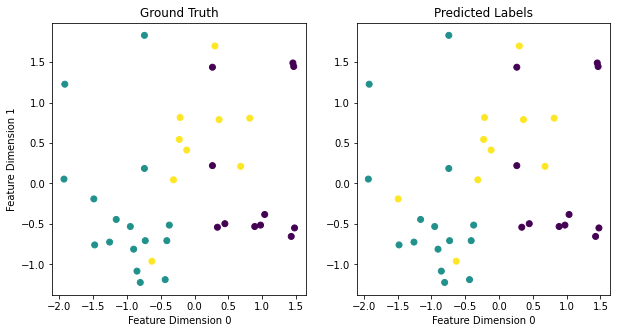

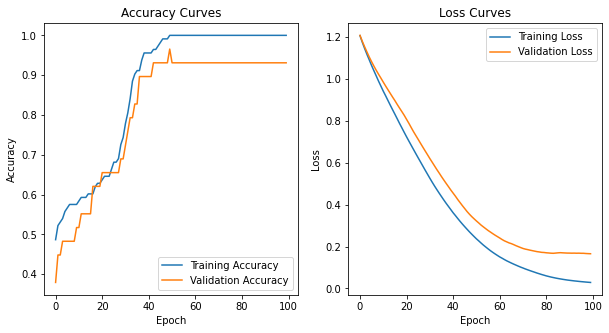

In [65]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

data = np.load("wineData.npy")
labels = np.load("wineLabels.npy")

x_feature = 0
y_feature = 1
train_Data = data[int(0) : int(len(data) * .8),:]
train_Labels = labels[int(0) : int(len(labels) * .8),]
test_Data = data[int(len(data) * .8) : int(len(data)), :]
test_Labels = labels[int(len(labels) * .8) : int(len(labels)),]

normaliser = StandardScaler()
train_Data = normaliser.fit_transform(train_Data)
test_Data = normaliser.transform(test_Data)

model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(12, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(np.unique(train_Labels)), activation=tf.nn.softmax)])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy(),)

history = model.fit(train_Data, train_Labels, epochs=100, validation_split=0.2, verbose=1)
model.summary()

results = model.evaluate(test_Data, test_Labels)
print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')

plt.figure(figsize=[10,5])
plt.subplot(121)
plt.scatter(test_Data[:,0], test_Data[:,1], c=test_Labels)
plt.ylabel('Feature Dimension 1')
plt.xlabel('Feature Dimension 0')
plt.title('Ground Truth')
plt.subplot(122)
plt.title('Predicted Labels')
plt.xlabel('Feature Dimension 0')
plt.scatter(test_Data[:,0], test_Data[:,1], c=np.argmax(model.predict(test_Data), axis=1))
plt.show()

plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()





**Task 4.3 - Neural Network for Digit Recognition**  
Apply the Tensorflow framework, and more specifically the Keras sub module to create a deep learning model. To create our neural network we will create a tensorflow.keras.Sequential model.

Here we create a fully connected neural network for the MNIST dataset, where we flatten the data (60000, 784) and (10000, 784), normalise it (greyscale), then continue to create using the keras sequential model and create dense layers. Where training, predicting and evaluating our models accuracy all follow.

Epoch 1/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4978 - sparse_categorical_accuracy: 0.8601 - val_loss: 0.2673 - val_sparse_categorical_accuracy: 0.9208
Epoch 2/10
1500/1500 [==============================] - 1s 936us/step - loss: 0.2437 - sparse_categorical_accuracy: 0.9309 - val_loss: 0.2095 - val_sparse_categorical_accuracy: 0.9413
Epoch 3/10
1500/1500 [==============================] - 1s 869us/step - loss: 0.2024 - sparse_categorical_accuracy: 0.9414 - val_loss: 0.1891 - val_sparse_categorical_accuracy: 0.9452
Epoch 4/10
1500/1500 [==============================] - 1s 890us/step - loss: 0.1768 - sparse_categorical_accuracy: 0.9491 - val_loss: 0.1962 - val_sparse_categorical_accuracy: 0.9408
Epoch 5/10
1500/1500 [==============================] - 1s 858us/step - loss: 0.1577 - sparse_categorical_accuracy: 0.9539 - val_loss: 0.1811 - val_sparse_categorical_accuracy: 0.9488
Epoch 6/10
1500/1500 [==============================] - 1s 858us/step - loss: 0.14

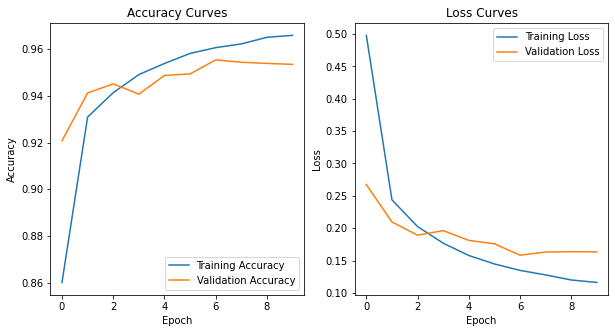

In [141]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train / 255
x_test = x_test / 255

model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(20, activation=tf.nn.relu),
    tf.keras.layers.Dense(15, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(np.unique(y_train)), activation=tf.nn.softmax)])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy(),)

history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1)
model.summary()

results = model.evaluate(x_test, y_test)
print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')

plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()


**Task 4.4 - Convolutional Neural Network for Digit Recognition**  
Apply the Tensorflow framework, and more specifically the Keras sub module to create a deep learning model. To create our neural network we will create a tensorflow.keras.Sequential model.

Here we will be making a convultional Neural network, as we are dealing with images (greyscale, 28x28) what this does is pass a filter kernal over the image to split the image into features and shapes that it learns from. We use this to classify images. First we have to expand the data to the 4th dimension, this is just indicating it as a greyscale dimension 1 (RGB would be dimension 3) We then normalise it to fit the greyscale, with training using Conv2D and MaxPooling layers from ts.keras.layers which are not the same as dense layers (fully connected) predicting and evaluation of models accuracy then follow.

Epoch 1/10
1500/1500 [==============================] - 61s 41ms/step - loss: 0.1834 - sparse_categorical_accuracy: 0.9465 - val_loss: 0.0899 - val_sparse_categorical_accuracy: 0.9733
Epoch 2/10
1500/1500 [==============================] - 51s 34ms/step - loss: 0.0690 - sparse_categorical_accuracy: 0.9795 - val_loss: 0.0658 - val_sparse_categorical_accuracy: 0.9805
Epoch 3/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.0514 - sparse_categorical_accuracy: 0.9844 - val_loss: 0.0665 - val_sparse_categorical_accuracy: 0.9797
Epoch 4/10
1500/1500 [==============================] - 44s 29ms/step - loss: 0.0393 - sparse_categorical_accuracy: 0.9880 - val_loss: 0.0633 - val_sparse_categorical_accuracy: 0.9817
Epoch 5/10
1500/1500 [==============================] - 44s 29ms/step - loss: 0.0310 - sparse_categorical_accuracy: 0.9900 - val_loss: 0.0614 - val_sparse_categorical_accuracy: 0.9822
Epoch 6/10
1500/1500 [==============================] - 44s 29ms/step - loss: 0.

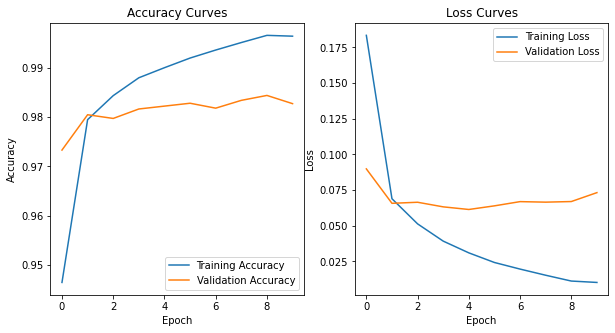

In [203]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)
x_train = x_train / 255
x_test = x_test / 255

model = tf.keras.Sequential(layers=[
    tf.keras.layers.Conv2D(128, 3, input_shape=x_train.shape[1:], activation=tf.nn.relu),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(np.unique(y_train)), activation=tf.nn.softmax)])

model.compile(optimizer=tf.keras.optimizers.Adam(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              metrics=tf.keras.metrics.SparseCategoricalAccuracy(),)

history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1)
model.summary()

results = model.evaluate(x_test, y_test)
print(f'Test set loss: {results[0]:0.2f}, test set accuracy: {results[1]*100:0.2f}%')

plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()